In [10]:
import pyproj
import requests
import json

In [35]:
sjtsk = pyproj.Proj("+init=epsg:5514")
wgs = pyproj.Proj("+init=epsg:4326")

In [41]:
def sjtsk_to_wgs(x, y):
    return pyproj.transform(sjtsk, wgs, x, y)

def wgs_to_sjtsk(x, y):
    return pyproj.transform(wgs, sjtsk, x, y)

In [39]:
sjtsk_to_wgs(-601885.3090766314,-1162995.8913748763)

(16.560548365178175, 49.1714769595685)

In [68]:
def get_image2(sjtsk_bbox=None, wgs_bbox=None):
    if wgs_bbox:
        sjtsk_bbox = list(wgs_to_sjtsk(wgs_bbox[0], wgs_bbox[1])) + list(wgs_to_sjtsk(wgs_bbox[2], wgs_bbox[3]))
    url = (("http://gis.brno.cz/arcgis/rest/services/PUBLIC/pasport_zelene/MapServer/export?" 
          + "dpi=96&transparent=true&format=png8&"
          + "bbox={0}%2C{1}%2C{2}%2C{3}&bboxSR=102067&imageSR=102067&size=1314%2C889&f=image")
           .format(
        *sjtsk_bbox))
    print(url)
    response = requests.get(url)
    return response.content

http://gis.brno.cz/arcgis/rest/services/PUBLIC/pasport_zelene/MapServer/export?dpi=96&transparent=true&format=png8&bbox=-601802.2145818251%2C-1162981.6212326337%2C-601432.8201991251%2C-1162940.7608017202&bboxSR=102067&imageSR=102067&size=1314%2C889&f=image


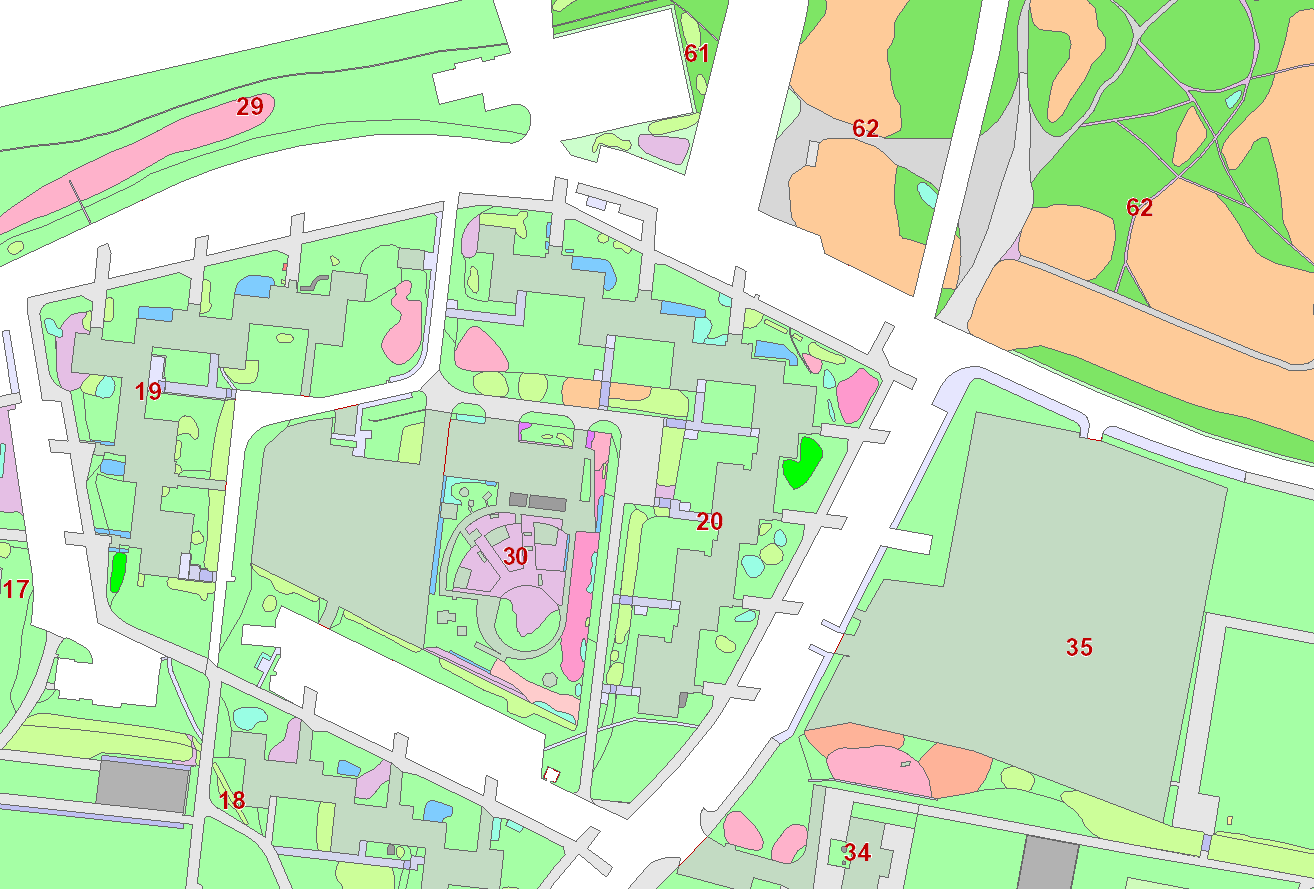

In [86]:
response= get_image2([-601802.2145818251,-1162981.6212326337,-601432.8201991251,-1162940.7608017202])
from IPython.display import Image
Image(data=response)

http://gis.brno.cz/arcgis/rest/services/PUBLIC/pasport_zelene/MapServer/export?dpi=96&transparent=true&format=png8&bbox=-608469.7432694673%2C-1169153.586133335%2C-590730.0578111948%2C-1154297.1383672045&bboxSR=102067&imageSR=102067&size=1314%2C889&f=image


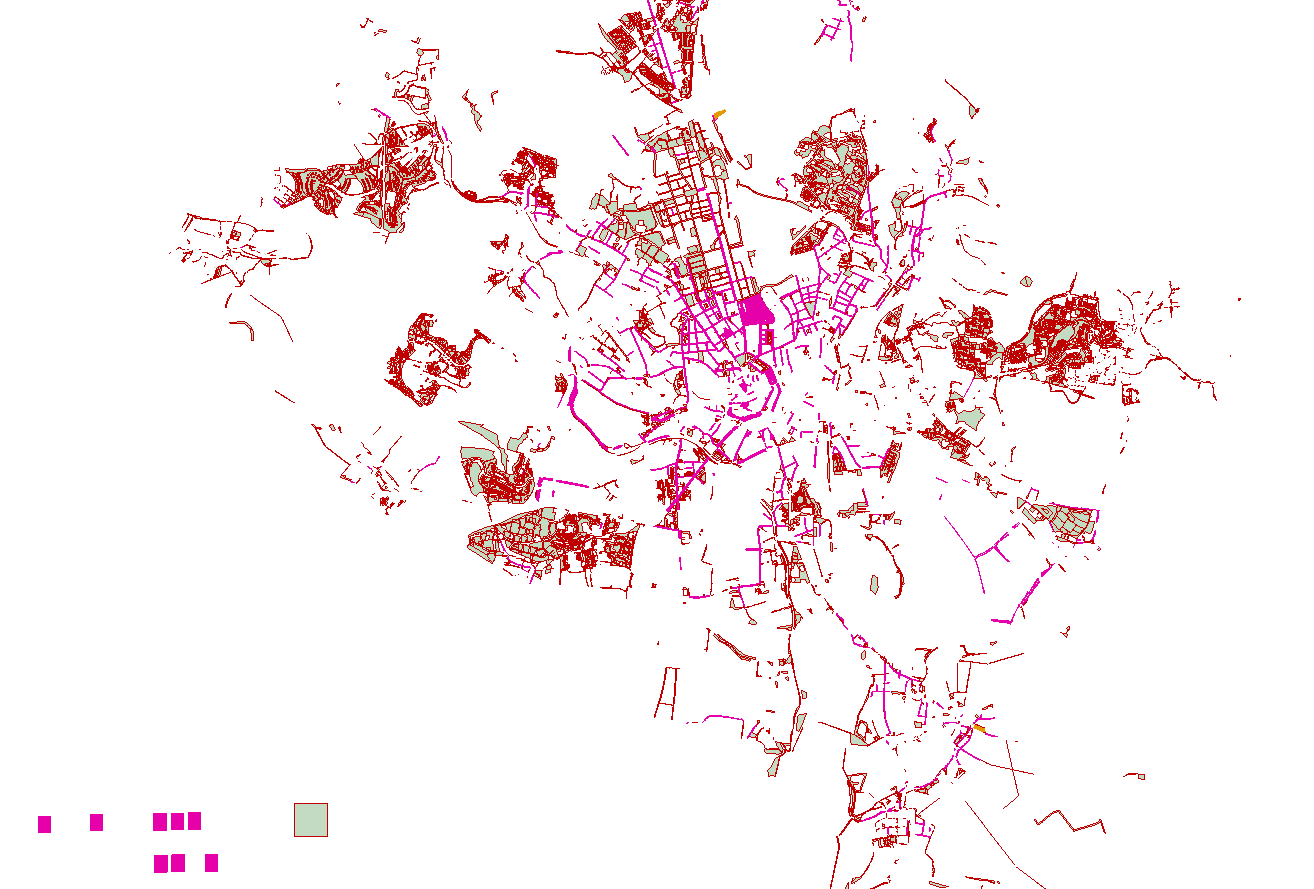

In [80]:
response= get_image(wgs_bbox=[16.48, 49.11, 16.7, 49.26])
from IPython.display import Image
Image(data=response)

http://gis.brno.cz/arcgis/rest/services/PUBLIC/pasport_zelene/MapServer/export?dpi=96&transparent=true&format=png8&bbox=-601485.4076021408%2C-1157734.6927318731%2C-601316.5350392995%2C-1157529.3365256435&bboxSR=102067&imageSR=102067&size=1314%2C889&f=image


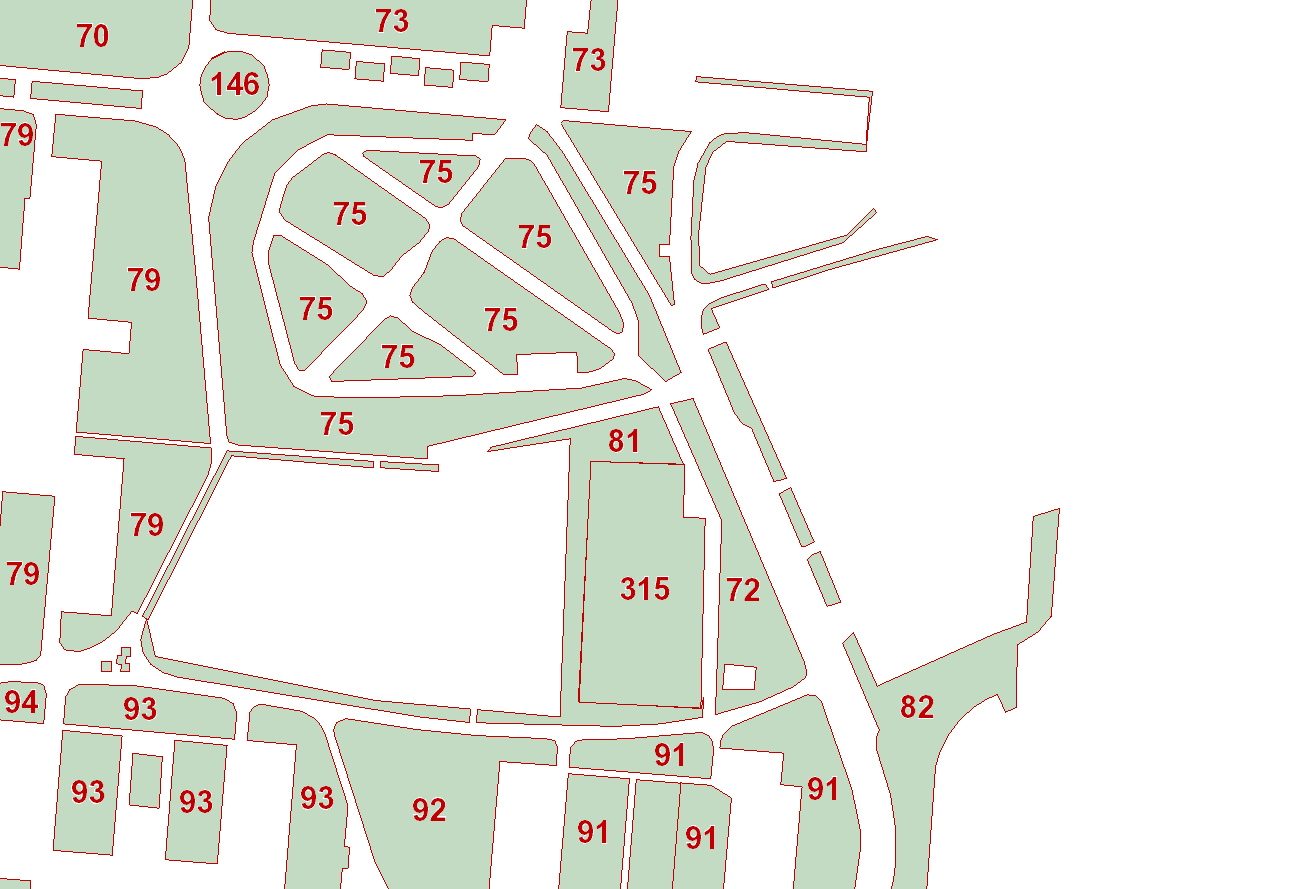

In [91]:
response= get_image2(wgs_bbox=[16.5582, 49.2189, 16.5602, 49.2209])
# response= get_image2(wgs_bbox=[16.5502, 49.2189, 16.5662, 49.2209])
from IPython.display import Image
Image(data=response)